# Praca domowa 3
## Wstęp do uczenia maszynowego
### Paweł Morgen

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('australia.csv')
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [67]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

## Podział na zbiór testowy i treningowy
Ponadto ustandaryzujemy zmienne numeryczne.

In [123]:
from sklearn.preprocessing import StandardScaler
X = data.drop('RainTomorrow', axis = 1)
y = data.loc[:,'RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

numeric_columns = data.columns[0:16].to_numpy()
scaler = StandardScaler().fit(X_train.loc[:, numeric_columns])
X_train.loc[:, numeric_columns] = scaler.transform(X_train.loc[:,numeric_columns])
X_test.loc[:, numeric_columns] = scaler.transform(X_test.loc[:,numeric_columns])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Wybór klasyfikatorów
W zbiorze danych dominują zmienne numeryczne, więc spróbujemy `KNearestNeighbours` oraz `LogisticRegression`.
Ponadto zobaczymy, jak sobie poradzi `randomForest`.
Zanim przystąpimy do działania, zobaczmy, czy zmienna `rainToday` nie jest związana z `rainTomorrow`. Posłużymy się metryką Jaccarda-Needhama.

Jaccard-Needham index: 0.7000417841846861


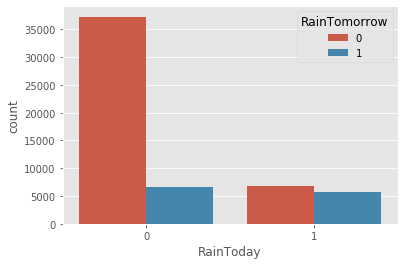

In [166]:
from scipy.spatial.distance import jaccard
print('Jaccard-Needham index:', jaccard(data.loc[:,'RainToday'], data.loc[:,'RainTomorrow']))

plt.style.use('ggplot')
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = data)

In [167]:
pd.crosstab(data.loc[:,'RainToday'], data.loc[:,'RainTomorrow'])

RainTomorrow,0,1
RainToday,,
0,37274,6684
1,6719,5743


Powiązanie jest bardzo wysokie. Jeśli nie padało dziś, to bardzo możliwe, że nie będzie padać jutro. Na szczęście mamy w zbiorze danych ciągłą zmienną `Rainfall` - niesie ona informację o zmiennej `RainToday`.

In [162]:
df = data.loc[:,['RainToday', 'Rainfall']].assign(NoRainFall = (data.loc[:,'Rainfall'] > 1).astype('int'))
pd.crosstab(df.loc[:,'RainToday'], df.loc[:,'NoRainFall'])

NoRainFall,0,1
RainToday,,
0,43958,0
1,0,12462


Jak widzimy, zmienna `RainToday` przyjmuje wartość 1 wtedy i tylko wtedy, gdy zmienna `Rainfall` jest większa od 1 (gdy opad wyniósł więcej niż 1 mm). Zatem możemy trenować modele na danych bez zmiennej `RainToday` - nie stracimy informacji z niej płynących, bo będą w zmiennej `RainFall`.

## Trening modeli

In [73]:
X_test_num = X_test.drop('RainToday', axis = 1)
X_train_num = X_train.drop('RainToday', axis = 1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### K-Nearest Neighbours
Hiperparametr: `n_neighbors` - ilość najbliższych punktów brana pod uwagę przy wyznaczaniu klasy.
Mniejszy -> mniejsza dokładność modelu; 
Większy -> większa złożoność algorytmu oraz podatność na overfitting

In [74]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn_cv_scores = cross_val_score(knn, X_train_num, y_train, cv = 5)
print(np.mean(knn_cv_scores), np.std(knn_cv_scores))

0.8406371590687496 0.002599207808854566


In [75]:
knn.fit(X_train_num, y_train)
knn_y_pred = knn.predict(X_test_num)

### Regresja logistyczna
Hiperparametr: `C` - odwrotność tzw. *stałej regularyzacji*. Służy ona do *karania* modelu za tworzenie zbyt dużych stałych przy wyznaczaniu regresji. 
Mniejszy -> większa kara -> mniejsza dokładność modelu; 
Większy -> mniejsza kara -> większa złożoność algorytmu oraz podatność na overfitting

In [78]:
logreg = LogisticRegression(C = 1)
logreg_cv_scores = cross_val_score(logreg, X_train_num, y_train, cv = 5)
print(np.mean(logreg_cv_scores), np.std(logreg_cv_scores))

0.8539745652522077 0.002488505126005121


In [79]:
logreg.fit(X_train_num, y_train)
logreg_y_pred = logreg.predict(X_test_num)

### Las losowy
Hiperparametr: `n_estimators` - ilość drzew. Mniejszy -> mniejsza dokładność modelu; Większy -> większa złożoność algorytmu. Ponadto od pewnego poziomu różnice w skuteczności modelu są znikome.

In [124]:
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)
rforest_cv_scores = cross_val_score(rforest, X_train, y_train, cv = 5)
print(np.mean(rforest_cv_scores), np.std(rforest_cv_scores))

0.8503854900125105 0.0032177713850063258


In [126]:
rforest.fit(X_train, y_train)
rforest_y_pred = rforest.predict(X_test)

## Ocena skuteczności klasyfikatorów
Wykorzystamy **ROC_AUC**, **RECALL** oraz **PRECISION**.

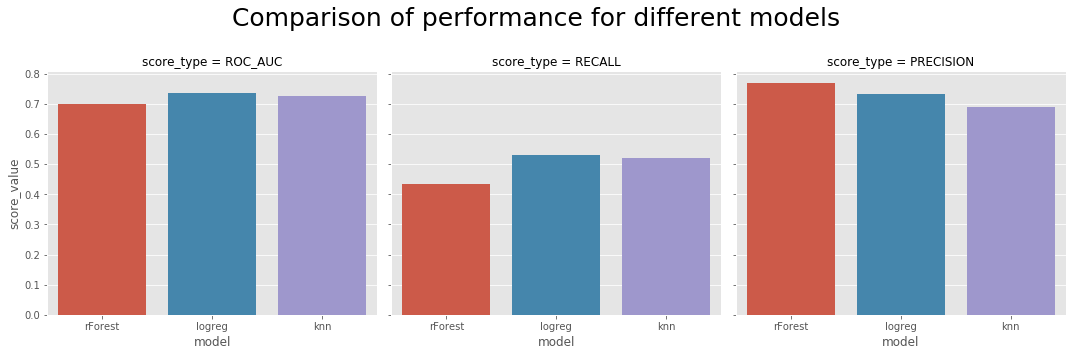

In [130]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score
def calculate_scores(y_pred):
    return np.array([roc_auc_score(y_test, y_pred),
                     recall_score(y_test, y_pred),
                     precision_score(y_test, y_pred)])
df = pd.DataFrame({'rForest' : calculate_scores(rforest_y_pred),
                    'logreg'  : calculate_scores(logreg_y_pred),
                    'knn'     : calculate_scores(knn_y_pred)})
df_long = pd.melt(df,
                 value_vars = ['rForest', 'logreg', 'knn'],
                 value_name = 'score_value',
                 var_name = 'model')
df_long.loc[:,'score_type'] = np.tile(np.array(['ROC_AUC', 'RECALL', 'PRECISION']), 3)

plt.style.use('ggplot')
g = sns.catplot(x = 'model', 
            y = 'score_value', 
            col = 'score_type', 
            data = df_long, 
            kind = 'bar')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Comparison of performance for different models',
              fontsize = 25)
g

Dość ciekawe obserwacje. Przy użyciu uniwersalnej miary **ROC AUC** wszystkie 3 modele miały porównywalną skuteczność. Przy miarze **RECALL** las losowy wyraźnie odstaje od reszty grupy; z kolei przy **PRECISION** się wyróżnia.

Wybór dobrego modelu zależy od celów biznesowych naszego modelu. Moim zdaniem ważniejsza jest miara **RECALL** od **PRECISION** - lepiej fałszywie klasyfikować dni słoneczne jako deszczowe (i mieć miłą niespodziankę) niż dni deszczowe jako słoneczne (i mieć niemiłą niespodziankę). Zatem odrzuciłbym model lasu losowego. Z kolei z modeli regresji liniowej oraz k najbliższych sąsiadów jednoznacznie lepsza jest regresja liniowa - przy równych **ROC AUC** i **RECALL** ma wyższe **PRECISION**.

Zatem ostatecznie użyłbym **regresji logistycznej**.